# **Name:** Ayush Dattatray Bhagat

# Problem Statement:

Develop a fraud detection system using supervised classification techniques to identify fraudulent activities in financial transactions. The goal is to accurately classify transactions as either fraudulent or legitimate based on available features. The performance of the system will be evaluated using precision, recall, and F1-score metrics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = "/content/drive/MyDrive/creditcard.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
data = pd.read_csv(filepath)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

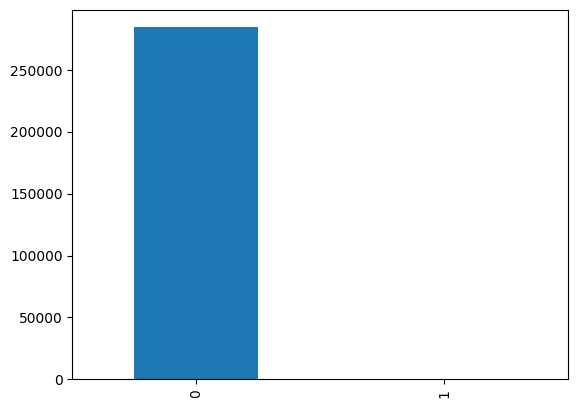

In [ ]:
data.Class.value_counts().plot.bar()
plt.show()

In [ ]:
stat_df=pd.DataFrame() # making an empty dataframe to store name of feature and pvalue
stat_df['Feature']=data.drop(columns='Class').columns
pvalue=[]

for i in data.drop(columns='Class').columns:
    class_1=data.loc[data.Class==1,i]
    class_0=data.loc[data.Class==0,i]
    pvalue.append(stats.ttest_ind(class_1,class_0)[1])

stat_df['Pvalue']=pvalue

In [ ]:
selected_features=stat_df.loc[stat_df.Pvalue<0.05]['Feature'].values

In [ ]:
x=data[selected_features]
y=data.Class

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 42)

In [ ]:
x_train.shape

(199364, 27)

In [ ]:
x_test.shape

(85443, 27)

In [ ]:
y_train.shape

(199364,)

In [ ]:
y_test.shape

(85443,)

In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

            Time        V1        V2        V3        V4        V5        V6  \
2557      2105.0 -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326   
247823  153702.0 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848   
152342   97283.0 -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493   
103385   68628.0  1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122   
8771     11951.0 -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [ ]:
sc=StandardScaler()
x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [ ]:
x_train_s=sm.add_constant(x_train_s)
x_test_s=sm.add_constant(x_test_s)

In [ ]:
y_train=y_train.reset_index().drop(columns='index')
y_test=y_test.reset_index().drop(columns='index')

In [ ]:
def eval(y_test,y_pred):
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('f1_score:',f1_score(y_test,y_pred))
  print('Precision:',precision_score(y_test,y_pred))
  print('Recall:',recall_score(y_test,y_pred))
  print('Classification report:\n',classification_report(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred)
  ConfusionMatrixDisplay(cm).plot()
  plt.title('Confusion Matrix.')
  plt.show()

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
dt_model=model.fit(x_train,y_train)

In [ ]:
y_pred = dt_model.predict(x_test)

Accuracy Score: 0.99916903666772
f1_score: 0.7560137457044674
Precision: 0.7096774193548387
Recall: 0.8088235294117647
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.81      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



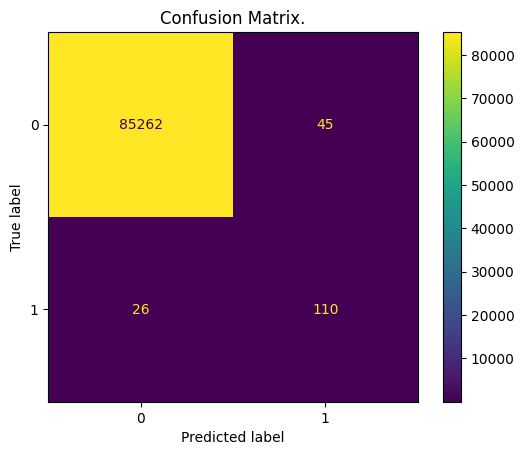

In [ ]:
eval(y_test,y_pred)

In [ ]:
base_model=sm.Logit(y_train,x_train_s).fit()
y_pred_proba=base_model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.004153
         Iterations 14


In [ ]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199336
Method:                           MLE   Df Model:                           27
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.6826
Time:                        10:27:07   Log-Likelihood:                -827.97
converged:                       True   LL-Null:                       -2608.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5166      0.172    -49.437      0.000      -8.854      -8.179
Time          -0.2209      0.116     -1.903      0.057      -0.448       0.007
V1             0.2408      0.097      2.484      0.013       0.051       0.431
V2             0.0624      0.115      0.545      0.586      -0.162       0.287
V3            -0.0292      0.093     -0.313      0.754      -0.212       0.153
V4             1.0278      0.133      7.718      0.000       0.767       1.289
V5             0.2336      0.104      2.252      0.024       0.030       0.437
V6            -0.1172      0.104     -1.130      0.258      -0.321       0.086
V7            -0.1139      0.097     -1.172      0.241      -0.304       0.077
V8            -0.2094      0.046     -4.543      0.000      -0.300      -0.119
V9            -0.1886      0.147     -1.280      0.201      -0.478       0.100
V10           -0.7824      0.129     -6.088      0.000      -1.034      -0.530
V11           -0.1370      0.095     -1.438      0.151      -0.324       0.050
V12            0.0689      0.107      0.645      0.519      -0.140       0.278
V13           -0.2658      0.094     -2.838      0.005      -0.449      -0.082
V14           -0.5347      0.072     -7.380      0.000      -0.677      -0.393
V15           -0.0531      0.093     -0.573      0.567      -0.235       0.129
V16           -0.3250      0.115     -2.820      0.005      -0.551      -0.099
V17           -0.0798      0.072     -1.105      0.269      -0.221       0.062
V18            0.0582      0.120      0.483      0.629      -0.178       0.294
V19            0.0004      0.090      0.004      0.997      -0.176       0.177
V20           -0.3818      0.074     -5.184      0.000      -0.526      -0.237
V21            0.1225      0.036      3.358      0.001       0.051       0.194
V24            0.0761      0.100      0.761      0.447      -0.120       0.272
V26            0.0983      0.104      0.949      0.342      -0.105       0.301
V27           -0.3761      0.060     -6.311      0.000      -0.493      -0.259
V28           -0.1474      0.039     -3.766      0.000      -0.224      -0.071
Amount         0.2639      0.100      2.650      0.008       0.069       0.459
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
y_pred=[]
for i in y_pred_proba:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score: 0.9992509626300574
f1_score: 0.7241379310344829
Precision: 0.875
Recall: 0.6176470588235294
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



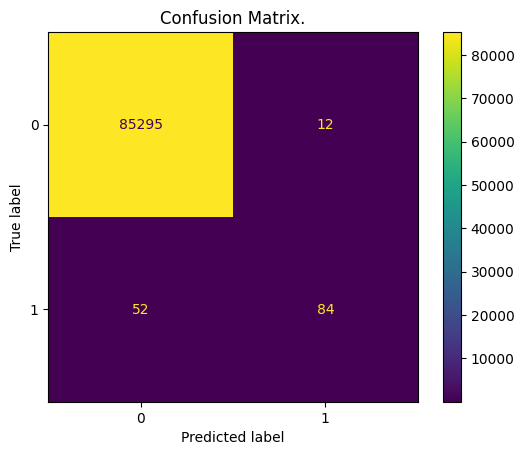

In [ ]:
eval(y_test,y_pred)

# Conclusion

1.   We observe that we get an excellent accuracy score of 99.9% but a poor recall score. This due to the high imbalance in the target class.
2.   The best method to solve the given problem was applying an oversampling technique and then applying Logistic regression.
1.   Tree based models seem to be giving a good f1-score but a poor recall score comparitively
